In [1]:
%%bash 
rm d_norms*
ls

0_pickled_controls106.pkl
0_pickled_controls4.pkl
0_pickled_controls5.pkl
1_pickled_controls106.pkl
1_pickled_controls4.pkl
1_pickled_controls5.pkl
2q_controls
controls_10
controls_100
controls_106
controls_11
controls_12
controls_13
controls_14
controls_15
controls_16
controls_17
controls_18
controls_19
controls_20
controls_21
controls_22
controls_23
controls_24
controls_25
controls_26
controls_27
controls_28
controls_29
controls_30
controls_31
controls_32
controls_33
controls_34
controls_35
controls_36
controls_37
controls_38
controls_39
controls_40
controls_41
controls_42
controls_43
controls_44
controls_45
controls_46
controls_47
controls_48
controls_49
controls_50
controls_51
controls_52
controls_53
controls_54
controls_55
controls_56
controls_57
controls_58
controls_59
controls_60
controls_61
controls_62
controls_63
controls_64
controls_65
controls_66
controls_67
controls_68
controls_70
controls_71
controls_72
controls_74
controls_75
controls_76
controls_77
controls_78
controls_7

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import dill
import numpy as np
import random
mypath = 'controls_106'
_file = 'pickled_controls106.pkl'
filename = os.path.join(mypath, _file)


In [4]:
import numpy as np
import dill
pca = dill.load(open(filename, 'rb'))
num_steps = 25
dt = 5/2 * np.pi/num_steps
pca.dt = dt
pca.num_steps = num_steps

In [5]:
# Keep every_ith control. Increase this if you want to decrease the number of controls being considered.
every_ith = 29

def bangbang(index, x, d1, d2, d3, d4, num_steps):
    if x:
        xory = 0
    else:
        xory = 1
    dt = pca.dt
    control_hamiltonians = pca.control_hamiltonians
    controls = np.zeros((num_steps, int(len(pca.control_hamiltonians))))
#     choices = (np.random.rand(100) - .5)/20 + 1
    choices = [1]
    controls[index, xory] = (1 / dt * np.pi / 2) * d1 * random.choice(choices)
    controls[-(index+1), xory] = 1 / dt * np.pi / 2 * d2 * random.choice(choices)
    controls[index, 2+xory] = 1 / dt * np.pi / 2 * d3 * random.choice(choices)
    controls[-(index+1), 2+xory] = 1 / dt * np.pi / 2 * d4 * random.choice(choices)
    return controls
random.seed(100)
np.random.seed(100)
controls = []
import itertools
for directions in list(itertools.product([-1, 1], repeat=4)):
    for x in (True, False):
        for i in range(int(pca.controlset[0].shape[0]/2)):
            if i % every_ith != 0:
                continue
            controls.append(bangbang(i, x, *directions, num_steps))
pca.controlset = []
pca.controlset += controls
#pca.controlset += [np.random.rand(*pca.controlset[0].shape)/1000]
pca.num_controls = len(pca.controlset)
pca.weights = None

In [6]:
from convex import all_derivs
derivs = all_derivs(pca.controlset, pca.target_operator, pca.control_hamiltonians, pca.ambient_hamiltonian, pca.dt, 1)
derivs[1] = [np.delete(d, 2, 0) for d in derivs[1]]

Control 0 derivative.
Control 1 derivative.
Control 2 derivative.
Control 3 derivative.
Control 4 derivative.
Control 5 derivative.
Control 6 derivative.
Control 7 derivative.
Control 8 derivative.
Control 9 derivative.
Control 10 derivative.
Control 11 derivative.
Control 12 derivative.
Control 13 derivative.
Control 14 derivative.
Control 15 derivative.
Control 16 derivative.
Control 17 derivative.
Control 18 derivative.
Control 19 derivative.
Control 20 derivative.
Control 21 derivative.
Control 22 derivative.
Control 23 derivative.
Control 24 derivative.
Control 25 derivative.
Control 26 derivative.
Control 27 derivative.
Control 28 derivative.
Control 29 derivative.
Control 30 derivative.
Control 31 derivative.
Control 0 derivative.
Control 1 derivative.
Control 2 derivative.
Control 3 derivative.
Control 4 derivative.
Control 5 derivative.
Control 6 derivative.
Control 7 derivative.
Control 8 derivative.
Control 9 derivative.
Control 10 derivative.
Control 11 derivative.
Control 

In [7]:
# Confirm that the controls are reasonably good.

In [8]:
import scipy
[np.trace(scipy.linalg.expm(-1.j*d.reshape(4,4)))/4 for d in derivs[0]]

[(0.9990134497500474+2.2551405187698492e-17j),
 (0.9990134497500474+2.0816681711721685e-17j),
 (-0.9995065973716347-3.946713195441601e-18j),
 (-0.9995065973716347+7.127322342537909e-18j),
 (-0.9995065973716347+3.946713195441601e-18j),
 (-0.9995065973716347-7.127322342537909e-18j),
 (0.9990134497500474-2.2551405187698492e-17j),
 (0.9990134497500474-2.0816681711721685e-17j),
 (-0.9995065973716347-2.9772961360274174e-18j),
 (-0.9995065973716347+3.681381828337734e-18j),
 (0.9990134512991089+1.9081958235744878e-17j),
 (0.9990134512991091+2.6020852139652106e-17j),
 (0.9990134512991089-1.9081958235744878e-17j),
 (0.9990134512991091-2.6020852139652106e-17j),
 (-0.9995065973716347+2.9772961360274174e-18j),
 (-0.9995065973716347-3.681381828337734e-18j),
 (-0.9995065973716347+2.9772961360274174e-18j),
 (-0.9995065973716347-3.681381828337734e-18j),
 (0.9990134512991089-1.9081958235744878e-17j),
 (0.9990134512991091-2.6020852139652106e-17j),
 (0.9990134512991089+1.9081958235744878e-17j),
 (0.999013

In [9]:
import dill
_file = open('derivs', 'wb')
dill.dump(derivs, _file)

In [10]:
import matplotlib.pyplot as plt
def hist_and_support(weights, num=10):
    plt.hist(weights)
    np.argmax(weights)
    top_idx = np.argsort(np.array(weights).T)[0][-num:]
    top_values = [weights[i] for i in top_idx]
    print(f"SUPPORT:{np.sum(top_values)}")
    print(f"NUM CONTROLS: {num}")
    return top_idx, np.sum(top_values)

In [11]:
from pauli_channel_approximation import PCA

/home/anthony/repos/decorrelating_errors/code/pauli_channel_approximation.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/anthony/.pyenv/versions/3.6.3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/anthony/.pyenv/versions/3.6.3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/anthony/.pyenv/versions/3.6.3/envs/personal/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/anthony/.pyenv/versions/3.6.3/envs/personal/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/anthon

In [12]:
from convex import optimal_weights
pca.weights_0 = optimal_weights(derivs[:1], sparsity=True, sparsity_param=1)

Done with convex problem 0 out of 32
Done with convex problem 10 out of 32
Done with convex problem 20 out of 32
Done with convex problem 30 out of 32


In [13]:
num_weights = 10

SUPPORT:0.9962981491467217
NUM CONTROLS: 10


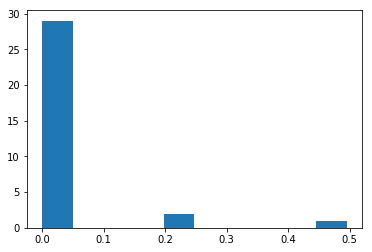

In [14]:
idx0, supp = hist_and_support(pca.weights_0, num_weights)

In [15]:
pca.weights_0

matrix([[-9.41034294e-10],
        [-9.41065277e-10],
        [ 1.12139833e-05],
        [ 3.06262384e-05],
        [ 2.42727291e-03],
        [ 3.06259719e-05],
        [ 5.17384012e-03],
        [ 4.92606577e-04],
        [ 1.12136300e-05],
        [ 3.06235155e-05],
        [-9.40735246e-10],
        [-9.41065761e-10],
        [ 2.30180837e-01],
        [ 1.16355115e-02],
        [ 1.12083400e-05],
        [ 3.06259764e-05],
        [ 2.42761427e-03],
        [ 3.06237751e-05],
        [ 2.30215647e-01],
        [ 1.16355646e-02],
        [ 4.95000216e-01],
        [-9.41065761e-10],
        [ 2.42761772e-03],
        [ 3.06262358e-05],
        [ 5.17402109e-03],
        [ 4.92133289e-04],
        [ 1.12086980e-05],
        [ 3.06237706e-05],
        [ 2.42728011e-03],
        [ 3.06235181e-05],
        [-9.41034288e-10],
        [-9.41065276e-10]])

In [16]:
from convex import optimal_weights
pca.weights = optimal_weights(derivs, sparsity=True, sparsity_param=1E-1)

Done with convex problem 0 out of 32
Done with convex problem 10 out of 32
Done with convex problem 20 out of 32
Done with convex problem 30 out of 32


In [17]:
pca.weights

matrix([[3.64745931e-04],
        [6.05416295e-04],
        [6.49942572e-07],
        [2.92043682e-04],
        [5.40464219e-05],
        [2.92044205e-04],
        [6.38571994e-07],
        [3.99874754e-07],
        [2.19092260e-03],
        [1.39070453e-05],
        [1.86547919e-01],
        [5.99743732e-02],
        [2.52922260e-01],
        [3.99892466e-07],
        [2.19524197e-03],
        [1.39070437e-05],
        [2.14238673e-03],
        [1.39070439e-05],
        [2.42075409e-01],
        [3.99892469e-07],
        [1.86569943e-01],
        [5.99743732e-02],
        [2.13800826e-03],
        [1.39070456e-05],
        [2.82454582e-07],
        [3.99874751e-07],
        [6.60702845e-07],
        [2.92044205e-04],
        [5.39072598e-05],
        [2.92043682e-04],
        [3.57990152e-04],
        [6.05416309e-04]])

SUPPORT:0.9967308362826728
NUM CONTROLS: 10


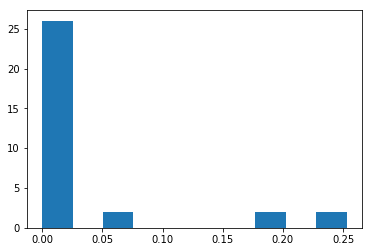

In [18]:
idx1, supp = hist_and_support(pca.weights, num_weights)

In [19]:
pca0 = dill.load(open(filename, 'rb'))
pca0.controlset = controls
subweights =  np.array(pca.weights_0)[idx0]
pca0.controlset = []
pca0.controlset += controls
pca0.controlset += [np.zeros(controls[0].shape)]
pca0.controlset = np.array(pca0.controlset)[idx0]
pca0.weights = None


pca0.num_controls = len(pca0.controlset)
pca0.probs = list(np.array(subweights.T/sum(subweights)).T)

In [20]:
pca1 = dill.load(open(filename, 'rb'))
pca1.controlset = controls
subweights = np.array(pca.weights)[idx1]
pca1.controlset = []
pca1.controlset += controls
pca1.controlset += [np.zeros(controls[0].shape)]
pca1.controlset = np.array(pca1.controlset)[idx1]
pca1.weights = None


pca1.num_controls = len(pca1.controlset)
pca1.probs = list(np.array(subweights.T/sum(subweights)).T)


In [21]:
import scipy
order = 0
# Zeroth order optimized weights
print('ZEROTH ORDER: {}'.format(scipy.linalg.norm(np.matrix(np.array([d.flatten() for d in derivs[order]])[idx0]).T.dot(pca0.probs))))

ZEROTH ORDER: 0.015504312841966577


In [22]:
import scipy
order = 0
# Zeroth order optimized weights
print("SUM: {}".format(sum(np.matrix(np.array([d.flatten() for d in derivs[order]])[idx0]).T.dot(pca0.probs))))

SUM: [[0.00308519-1.19706228e-16j]]


In [23]:
import scipy
order = 1
print('FIRST ORDER: {}'.format(scipy.linalg.norm(np.matrix(np.array([d.flatten() for d in derivs[order]])[idx0]).T.dot(pca0.probs))))

FIRST ORDER: 4.856878811618449


In [24]:
import scipy
order = 0
# Zeroth order optimized weights
print('ZEROTH ORDER: {}'.format(scipy.linalg.norm(np.matrix(np.array([d.flatten() for d in derivs[order]])[idx1]).T.dot(pca1.probs))))

ZEROTH ORDER: 0.0075886472446673355


In [25]:
import scipy
order = 0
# Zeroth order optimized weights
print("SUM: {}".format(sum(np.matrix(np.array([d.flatten() for d in derivs[order]])[idx1]).T.dot(pca1.probs))))

SUM: [[0.0151251+3.73179402e-17j]]


In [26]:
import scipy
order = 1
print('FIRST ORDER: {}'.format(scipy.linalg.norm(np.matrix(np.array([d.flatten() for d in derivs[order]])[idx1]).T.dot(pca1.probs))))

FIRST ORDER: 2.288458132231735


In [27]:
pca0.dt = dt
pca1.dt = dt
pca0.num_steps = num_steps
pca1.num_steps = num_steps
pca0.num_controls = len(pca0.controlset)
pca1.num_controls = len(pca1.controlset)

In [28]:
_file = 'pickled_controls106.pkl'
# Save the weighted controls
import dill
dill.dump(pca0, open('0_' + _file, 'wb'))

import dill
dill.dump(pca1, open('1_' + _file, 'wb'))

In [29]:
# Save the weighted controls
import dill
import os
import numpy as np


pca0 = dill.load(open('0_' + _file, 'rb'))
pca1 = dill.load(open('1_' + _file, 'rb'))

In [30]:
from pauli_channel_approximation import control_unitaries, error_unitary, off_diagonal_projection, adjoint
import sys
import itertools
from itertools import product
from copy import deepcopy
from functools import reduce
import numpy as np

from diamond import diamond_norm, jamiolkowski

def superoperator(unitary):

    return np.kron(unitary.conj(), unitary)

def choi_form(unitary):
    return np.matrix(jamiolkowski(superoperator(unitary)))

def diamond_distance(sopa, sopb):
    rtn = (jamiolkowski(sopa) - jamiolkowski(sopb))/2
    return diamond_norm(rtn)

def compute_diamond_norm(data):
    controlset, ambient_hamiltonian0, combo, dt, control_hamiltonians, target_operator, probs = data
    print("DOING COMBO {}".format(combo))
    sys.stdout.flush()
    fidelities = []
    projs = []
    sops = []
    controlset_unitaries = []
    d_norms = []

    for i, controls in enumerate(controlset):
        newcontrols = deepcopy(controls)
        ambient_hamiltonian = [deepcopy(ah).astype("complex") for ah in ambient_hamiltonian0]
        for cnum, value in enumerate(combo):
            cnum -= len(ambient_hamiltonian0)
            if cnum >= 0:
                newcontrols[:, cnum] = newcontrols[:, cnum] * (1 + value)
            if cnum < 0:
                if cnum == -1:
                    ambient_hamiltonian[cnum] *= 1 + float(value)
                else:
                    ambient_hamiltonian[cnum] *= float(value)
        step_unitaries = control_unitaries(ambient_hamiltonian,
                                           control_hamiltonians, newcontrols,
                                           dt)
        unitary = reduce(lambda a, b: a.dot(b), step_unitaries)
        sop = error_unitary(unitary, target_operator)
        sops.append(sop)
        print("Control {}".format(i))
        if i == 0:
            d_norms.append(diamond_distance(sop, np.eye(sop.shape[0])))
    avg_sop = reduce(lambda a, b: a + b, [prob * sops[i] for i, prob in enumerate(probs)])
    d_norms.append(diamond_distance(avg_sop, np.eye(avg_sop.shape[0])))
    return d_norms

def generate_indices(num_points, order_desired):
    num_indices = len(order_desired)
    tuples = product(range(num_points), repeat=num_indices)
    indices = [sum([num_points**(num_indices - 1 - order_desired[i]) * t[i] 
                    for i in range(num_indices)]) for t in tuples]
    return indices

In [31]:
%%bash 
rm d_norms*
ls

0_pickled_controls106.pkl
0_pickled_controls4.pkl
0_pickled_controls5.pkl
1_pickled_controls106.pkl
1_pickled_controls4.pkl
1_pickled_controls5.pkl
2q_controls
controls_10
controls_100
controls_106
controls_11
controls_12
controls_13
controls_14
controls_15
controls_16
controls_17
controls_18
controls_19
controls_20
controls_21
controls_22
controls_23
controls_24
controls_25
controls_26
controls_27
controls_28
controls_29
controls_30
controls_31
controls_32
controls_33
controls_34
controls_35
controls_36
controls_37
controls_38
controls_39
controls_40
controls_41
controls_42
controls_43
controls_44
controls_45
controls_46
controls_47
controls_48
controls_49
controls_50
controls_51
controls_52
controls_53
controls_54
controls_55
controls_56
controls_57
controls_58
controls_59
controls_60
controls_61
controls_62
controls_63
controls_64
controls_65
controls_66
controls_67
controls_68
controls_70
controls_71
controls_72
controls_74
controls_75
controls_76
controls_77
controls_78
controls_7

rm: cannot remove 'd_norms*': No such file or directory


In [32]:
import dill
all_results = []
base = np.logspace(-4.7, np.log(pca0.detunings[0][0])/np.log(10), 1)
values = np.concatenate([np.sort(-base),np.array([0]), base]) * 100
combinations0 = [[det, 0, 0, 0, 0, 0, 0] for det in values]
combinations1 = [[0, det, 0, 0, 0, 0, 0] for det in values]
combinations2 = [[0, 0, det, 0, 0, 0, 0] for det in values]
combinations3 = [[0, 0, 0, det, det, 0, 0] for det in values]
combinations4 = [[0, 0, 0, 0, 0, det, det] for det in values]

for j, pca in enumerate((pca0, pca1)):
    d_norms00 = []
    for i in range(len(combinations0)):
        combo = combinations0[i]
        lst = [pca.controlset, pca.ambient_hamiltonian, combo, pca.dt,
                pca.control_hamiltonians, pca.target_operator, pca.probs]
        d_norms00.append(compute_diamond_norm(lst))
        dill.dump(d_norms00, open('d_norms00_{}_{}'.format(i, j), 'wb'))
for j, pca in enumerate((pca0, pca1)):
    d_norms01 = []
    for i in range(len(combinations1)):
        combo = combinations1[i]
        lst = [pca.controlset, pca.ambient_hamiltonian, combo, pca.dt,
                pca.control_hamiltonians, pca.target_operator, pca.probs]
        d_norms01.append(compute_diamond_norm(lst))
        dill.dump(d_norms01, open('d_norms01_{}_{}'.format(i, j), 'wb'))
        
for j, pca in enumerate((pca0, pca1)):
    d_norms03 = []
    for i in range(len(combinations3)):
        combo = combinations3[i]
        lst = [pca.controlset, pca.ambient_hamiltonian, combo, pca.dt,
                pca.control_hamiltonians, pca.target_operator, pca.probs]
        d_norms03.append(compute_diamond_norm(lst))
        dill.dump(d_norms03, open('d_norms03_{}_{}'.format(i, j), 'wb'))
for j, pca in enumerate((pca0, pca1)):
    d_norms04 = []
    for i in range(len(combinations4)):
        combo = combinations4[i]
        lst = [pca.controlset, pca.ambient_hamiltonian, combo, pca.dt,
                pca.control_hamiltonians, pca.target_operator, pca.probs]
        d_norms04.append(compute_diamond_norm(lst))
        dill.dump(d_norms04, open('d_norms04_{}_{}'.format(i, j), 'wb'))

DOING COMBO [-0.0019952623149688785, 0, 0, 0, 0, 0, 0]
Control 0
Control 1
Control 2
Control 3
Control 4
Control 5
Control 6
Control 7
Control 8
Control 9
DOING COMBO [0.0, 0, 0, 0, 0, 0, 0]
Control 0
Control 1
Control 2
Control 3
Control 4
Control 5
Control 6
Control 7
Control 8
Control 9
DOING COMBO [0.0019952623149688785, 0, 0, 0, 0, 0, 0]
Control 0
Control 1
Control 2
Control 3
Control 4
Control 5
Control 6
Control 7
Control 8
Control 9
DOING COMBO [-0.0019952623149688785, 0, 0, 0, 0, 0, 0]
Control 0
Control 1
Control 2
Control 3
Control 4
Control 5
Control 6
Control 7
Control 8
Control 9
DOING COMBO [0.0, 0, 0, 0, 0, 0, 0]
Control 0
Control 1
Control 2
Control 3
Control 4
Control 5
Control 6
Control 7
Control 8
Control 9
DOING COMBO [0.0019952623149688785, 0, 0, 0, 0, 0, 0]
Control 0
Control 1
Control 2
Control 3
Control 4
Control 5
Control 6
Control 7
Control 8
Control 9
DOING COMBO [0, -0.0019952623149688785, 0, 0, 0, 0, 0]
Control 0
Control 1
Control 2
Control 3
Control 4
Contr

In [33]:
import dill
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
which_parameter = 0


d_norms00 = dill.load(open("d_norms0{}_2_0".format(which_parameter), 'rb'))
d_norms10 = dill.load(open("d_norms0{}_2_1".format(which_parameter), 'rb'))
values = np.array([-0.0019952623149688785, 0, 0.0019952623149688785])*100
for a, b in ((d_norms00, d_norms10),):# (diamond_norms01, diamond_norms11)):
    plt.figure(figsize=(10,6))
    plt.semilogy(values, np.array(a).T[0], linewidth = 2, alpha=.6, color='#a6bddb', label="Member of 0RBC", ls="-");
    plt.semilogy(values, np.array(b).T[0], linewidth = 2, alpha=.6, color='#a6bddb', label="Member of 1RBC", ls="--");


    plt.semilogy(values, np.array(a).T[-1], linewidth = 3, alpha=1, color='#2b8cbe', label="0RBC", ls="-");
    plt.semilogy(values,np.array(b).T[-1], linewidth = 3, alpha=1, color='#2b8cbe', label="1RBC", ls="--");
    plt.ylabel("Diamond Norm")
    plt.xlabel("Detuning")
    plt.legend()

FileNotFoundError: [Errno 2] No such file or directory: 'd_norms00_2_0'